# Predict Discount Based on Age

In [1]:
from random import randrange, choice
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


## Create Data

In [2]:
sample_size =10000
data_file = f'../data/discount_data_{sample_size}.xlsx'

business_list = ['bar', 'restaurant', 'hotel', 'pharmacy', 'spa', 'airline']


def calculate_discount(age, sex, business_type, is_resident):
    business_discounts = dict()
    business_discounts['restaurant'] = 0.2
    business_discounts['pharmacy'] = 0.2
    business_discounts['hotel'] = 0.25
    
    if sex == 'M' and age >= 64 and is_resident:
        return business_discounts.get(business_type, 0.0)
    elif sex == 'F' and age >= 57 and is_resident:
        return business_discounts.get(business_type, 0.0)
    else:
        return 0.0
    
def build_dataframe(samples):

    data = dict()
    data['sex'] = list()
    data['age'] = list()
    data['business_type'] = list()
    data['discount'] = list()
    data['is_resident'] = list()
    for i in range(samples):
        age = randrange(18, 95, 1)
        sex = choice(['M', 'F'])
        business_type = choice(business_list)
        is_resident =  choice([True, False])
        discount = calculate_discount(age, sex, business_type, is_resident)
        #print(f'{sex} age {age} for {business_type}')
        data['sex'].append(sex)
        data['age'].append(age)
        data['business_type'].append(business_type)
        data['discount'].append(discount)
        data['is_resident'].append(is_resident)

        df = pd.DataFrame.from_dict(data)
    return df
    


In [3]:
if os.path.exists(data_file):
    df = pd.read_excel(data_file)
    print(f'Loaded from {data_file}')
else:
    df = build_dataframe(sample_size)
    df.to_excel(data_file, index=False)
    print(f'Saved to {data_file}')

Loaded from ../data/discount_data_10000.xlsx


In [4]:
print(f'Shape: {df.shape}')
df.head()

Shape: (10000, 5)


,sex,age,business_type,discount,is_resident
0,F,78,bar,0.0,True
1,F,24,bar,0.0,False
2,F,45,bar,0.0,True
3,F,21,pharmacy,0.0,False
4,F,45,pharmacy,0.0,False


## Cleanup


### Separate dependent and independent variables

In [5]:
discounts = df['discount'].copy()
df.drop(columns=['discount',], inplace=True)

print(f'discount shape: {discounts.shape}')

df.head()

discount shape: (10000,)


,sex,age,business_type,is_resident
0,F,78,bar,True
1,F,24,bar,False
2,F,45,bar,True
3,F,21,pharmacy,False
4,F,45,pharmacy,False


### Hot One Encode

In [6]:
df = pd.get_dummies(df, columns=['sex', 'business_type'])


In [7]:


df['is_resident'].replace({False: 0, True: 1}, inplace=True)

### Scaling age

In [8]:
scaler = MinMaxScaler()
df['age'] = scaler.fit_transform(df['age'].values.reshape(-1, 1))


In [9]:
print(f'Shape: {df.shape}')
df.head()

Shape: (10000, 10)


,age,is_resident,sex_F,sex_M,business_type_airline,business_type_bar,business_type_hotel,business_type_pharmacy,business_type_restaurant,business_type_spa
0,0.789474,1,1,0,0,1,0,0,0,0
1,0.078947,0,1,0,0,1,0,0,0,0
2,0.355263,1,1,0,0,1,0,0,0,0
3,0.039474,0,1,0,0,0,0,1,0,0
4,0.355263,0,1,0,0,0,0,1,0,0


## Basic Neuronal Network


In [39]:
learning_rate = 0.001
input_layer = tf.keras.layers.Dense(units=df.shape[1], input_shape=[df.shape[1]])
hidden_layer = tf.keras.layers.Dense(units=256, activation='sigmoid')
output_layer = tf.keras.layers.Dense(units=1)

In [40]:
model = tf.keras.models.Sequential()

model.add(input_layer)
model.add(hidden_layer)
model.add(output_layer)


In [41]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate),
    loss='mean_squared_error',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(df.values, discounts.values, epochs=100)

Epoch 1/100
313/313 [==============================] - 1s 877us/step - loss: 0.0041 - accuracy: 0.8926
Epoch 2/100
313/313 [==============================] - 0s 903us/step - loss: 0.0032 - accuracy: 0.8926
Epoch 3/100
313/313 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 0.8926
Epoch 4/100
313/313 [==============================] - 0s 893us/step - loss: 0.0034 - accuracy: 0.8926
Epoch 5/100
313/313 [==============================] - 0s 852us/step - loss: 0.0033 - accuracy: 0.8926
Epoch 6/100
157/313 [==============>...............] - ETA: 0s - loss: 0.0031 - accuracy: 0.8959

In [32]:
print(history.history)

{'loss': [0.0030461682472378016, 0.0031355470418930054, 0.0031283267308026552, 0.003027488011866808, 0.0030785740818828344, 0.0031552466098219156, 0.003067881101742387, 0.0031371009536087513, 0.003077874658629298, 0.0030992000829428434, 0.0031215506605803967, 0.003067628014832735, 0.0031036112923175097, 0.003220289247110486, 0.0032421061769127846, 0.003132991958409548, 0.0030507545452564955, 0.0030375299975275993, 0.0031414965633302927, 0.003107258351519704, 0.0032478945795446634, 0.003149711526930332, 0.0030750527512282133, 0.0030482071451842785, 0.003145697060972452, 0.003118199063464999, 0.003309231484308839, 0.0030461372807621956, 0.003189569106325507, 0.003056977177038789, 0.003042510012164712, 0.0030180453322827816, 0.003220283193513751, 0.003059132257476449, 0.0031835732515901327, 0.0030574635602533817, 0.0031730709597468376, 0.0030517640989273787, 0.003160766325891018, 0.0032645268365740776, 0.003180315950885415, 0.0030630442779511213, 0.003049367805942893, 0.003019202500581741

<function matplotlib.pyplot.show(close=None, block=None)>

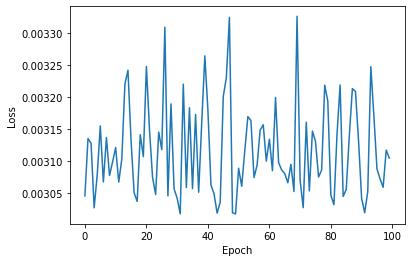

In [33]:
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.show

In [34]:
df_values = df.values
disc_value = discounts.values

for i in range(500):
    if disc_value[i] > 0.0:
        print(i)
        break

36


In [35]:
print(df_values[36].reshape(1,10))
print(disc_value[36])

[[0.92105263 1.         1.         0.         0.         0.
  0.         1.         0.         0.        ]]
0.2


In [36]:
pred = model.predict(df_values[36].reshape(1,10))

print(f'Estimated discount {pred}')

Estimated discount [[0.06717551]]


In [37]:
pred = model.predict(df_values[0].reshape(1,10))

print(f'Estimated discount {pred}')

Estimated discount [[0.03157118]]
